### ***Importing Libraries and Data***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

### ***Preparing the Data***

In [3]:
df = pd.DataFrame(raw_df) # (1012, 11)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [4]:
df = df.dropna().reset_index(drop=True) # (506, 11)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7


In [5]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO']
df.columns = feature_names
df['Price'] = pd.Series(target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  Price    506 non-null    float64
dtypes: float64(12)
memory usage: 47.6 KB


In [7]:
df.describe() # Summarizing the Stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,50.000000


In [8]:
df.isnull().sum() # Check the Missing Values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
Price      0
dtype: int64

### ***Understanding the Data***

In [15]:
df = pd.DataFrame(housing.data)
df.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
data = housing.data
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

### ***EDA***

In [9]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.468536


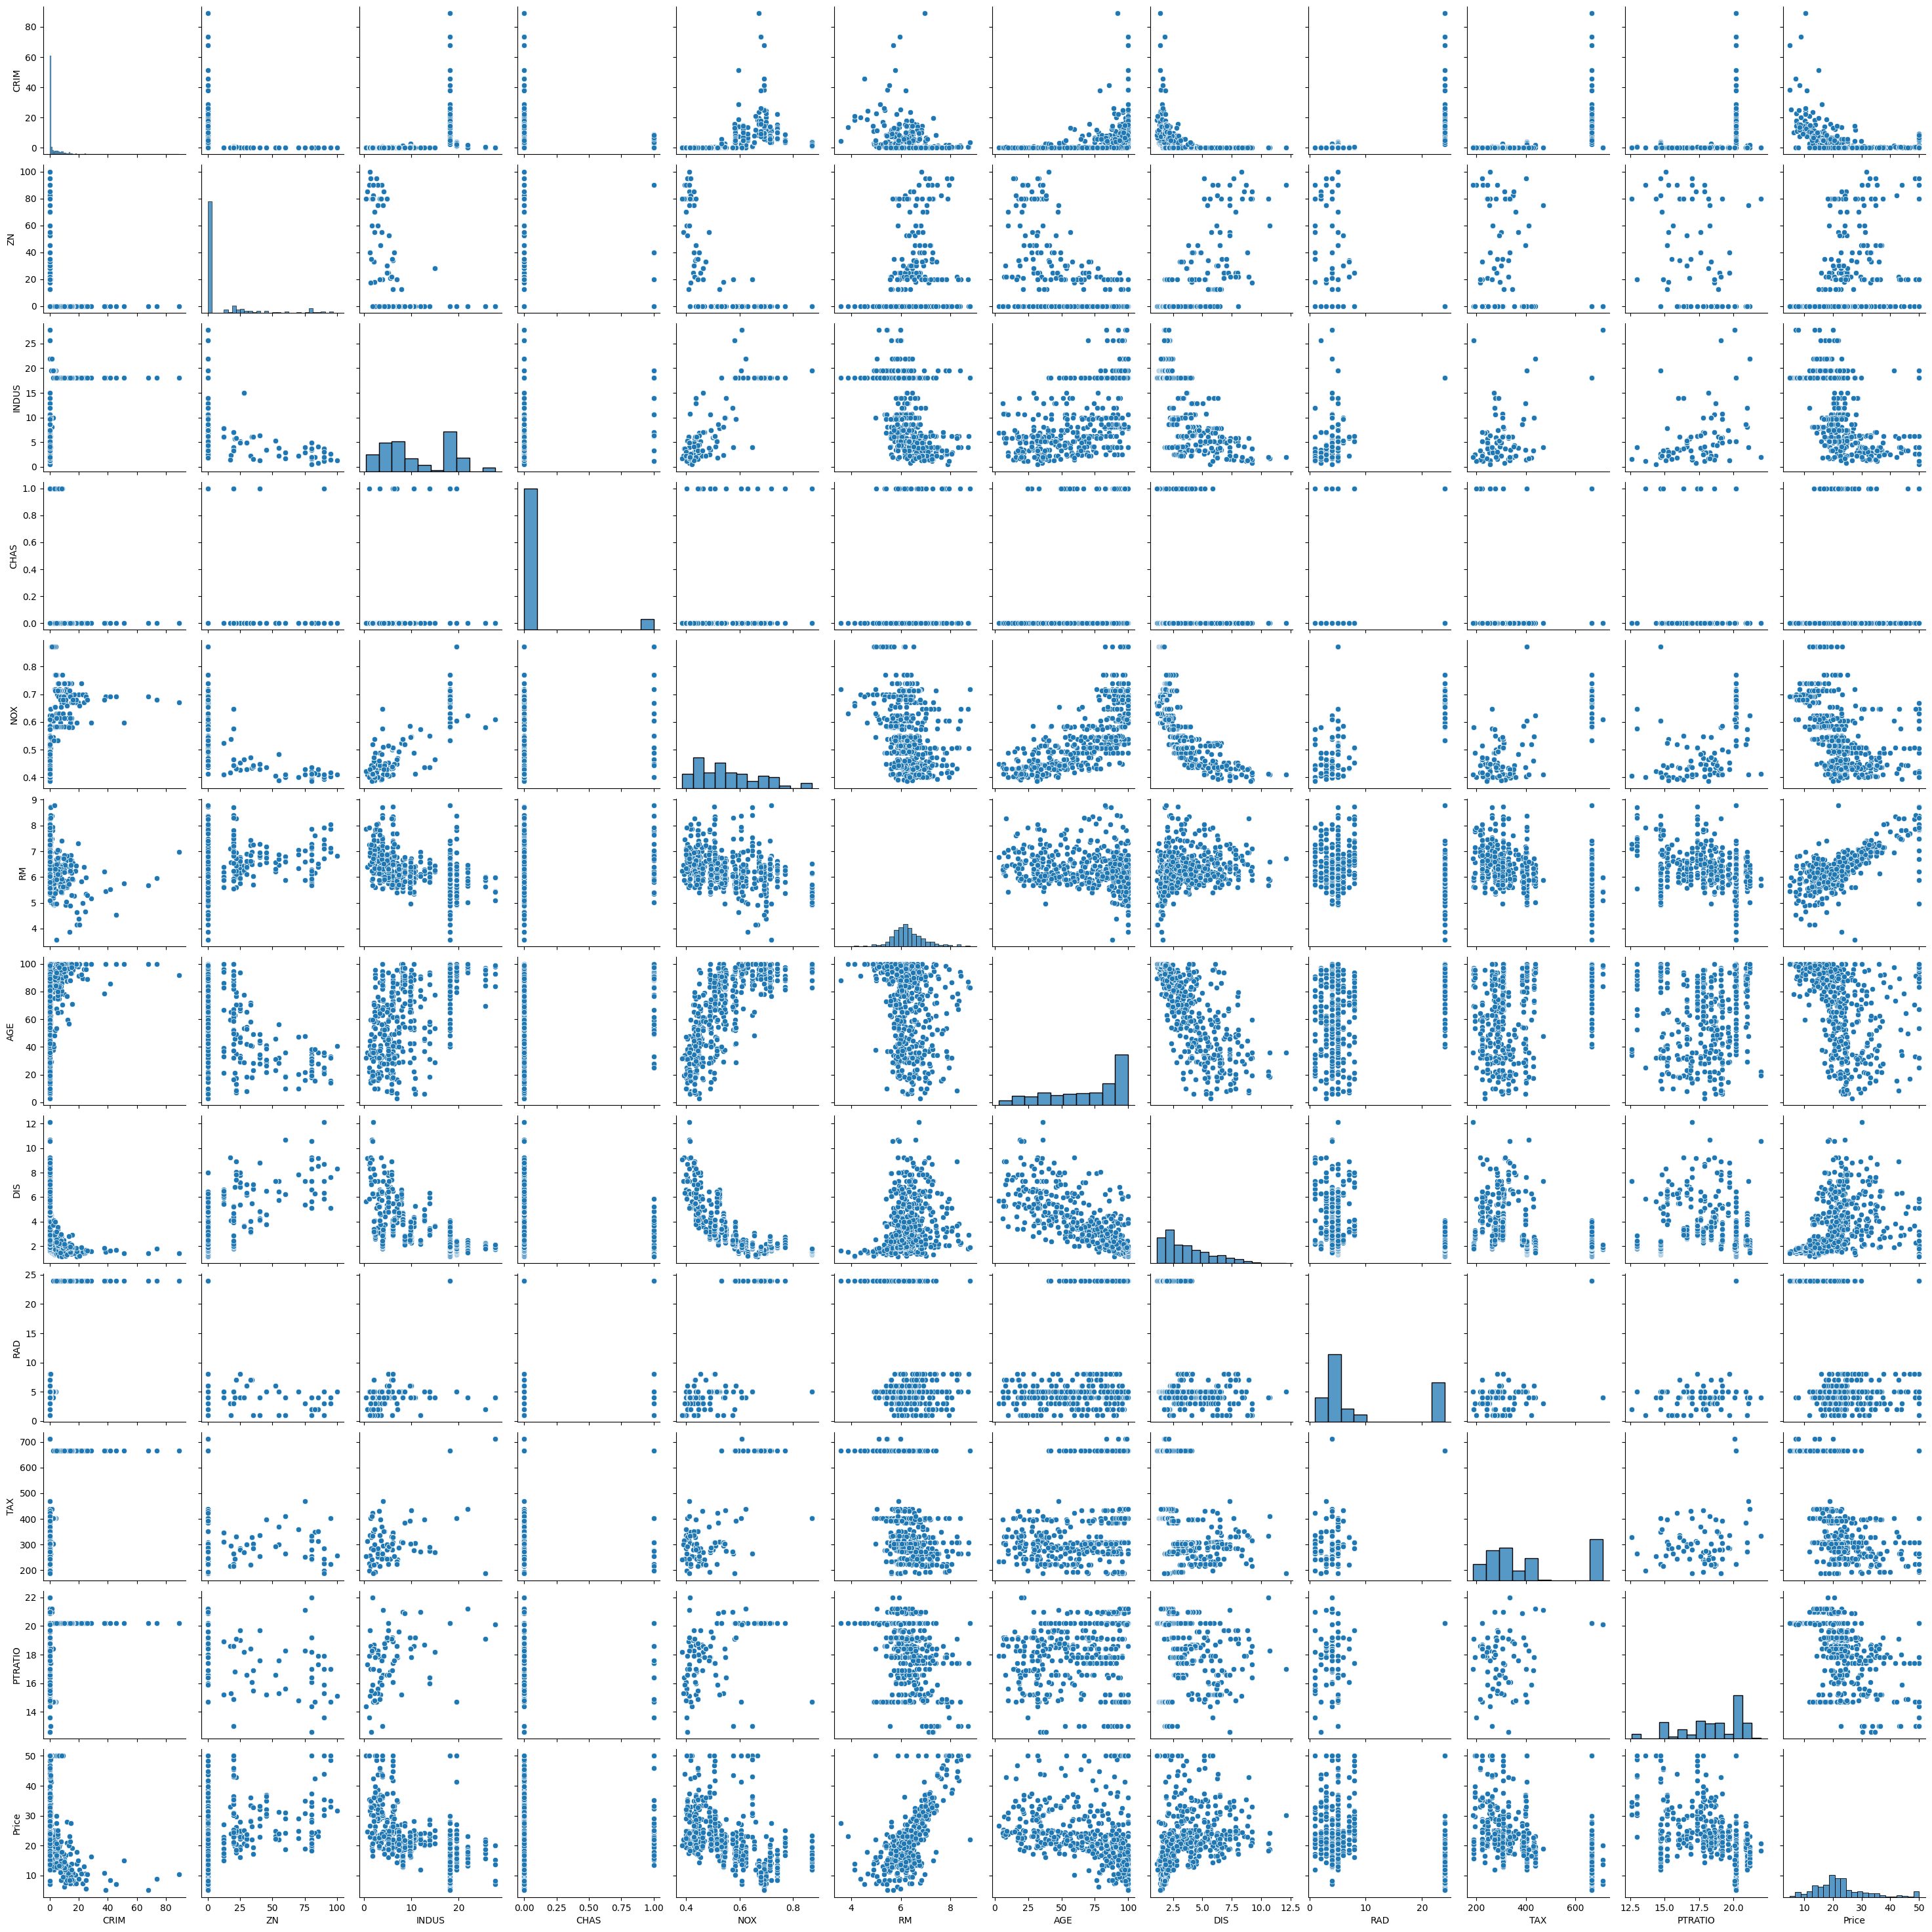

In [10]:
sns.pairplot(df);

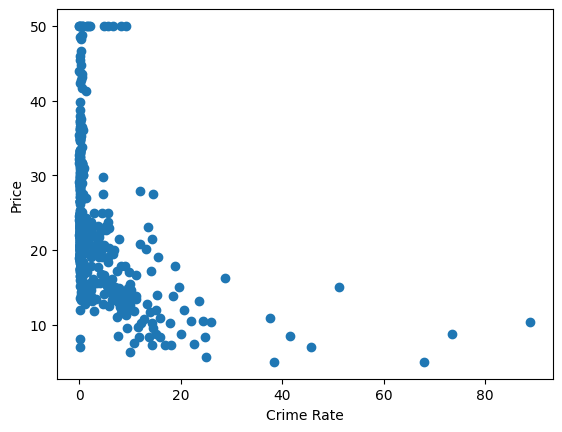

In [11]:
plt.scatter(df.CRIM, df.Price)
plt.xlabel('Crime Rate')
plt.ylabel('Price');

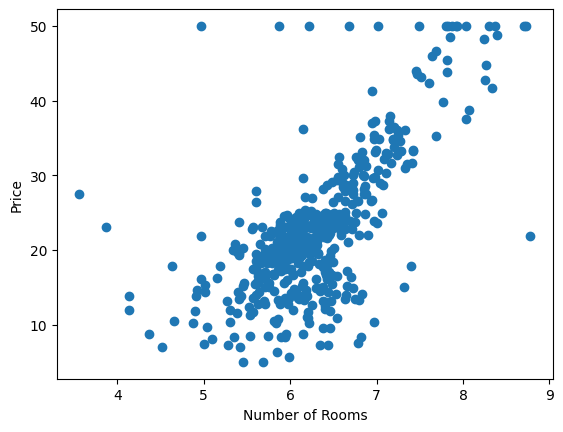

In [12]:
plt.scatter(df.RM, df.Price)
plt.xlabel('Number of Rooms')
plt.ylabel('Price');

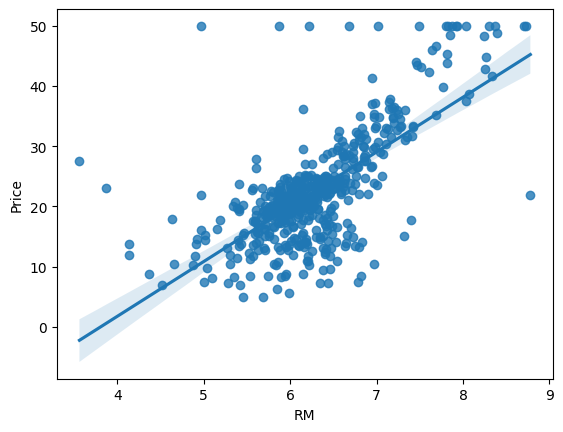

In [13]:
sns.regplot(x='RM', y='Price', data=df);

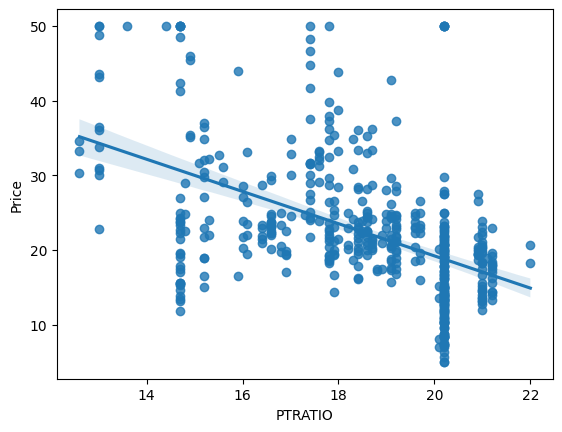

In [14]:
sns.regplot(x='PTRATIO', y='Price', data=df);

### ***Model Training***

In [15]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape) # (354, 11) (152, 11)

(354, 11) (152, 11)


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
pickle.dump(scaler, open('scaling.pkl', 'wb'))

In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.coef_, lm.intercept_)

[-1.51461649  0.57261901  0.05317954  1.2185105  -2.63222707  4.59542681
 -1.40612866 -3.14734454  1.50306379 -1.45396524 -2.23761466] 23.01581920903955


In [19]:
lm.get_params() # on which parameters the model has been trained

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [20]:
lm_pred = lm.predict(X_test)
residuals = y_test - lm_pred     # Residuals

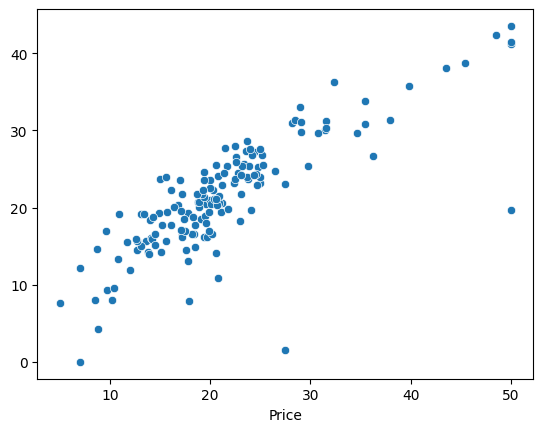

In [21]:
sns.scatterplot(x=y_test, y=lm_pred); # have to be straight line with the angle 45 grad

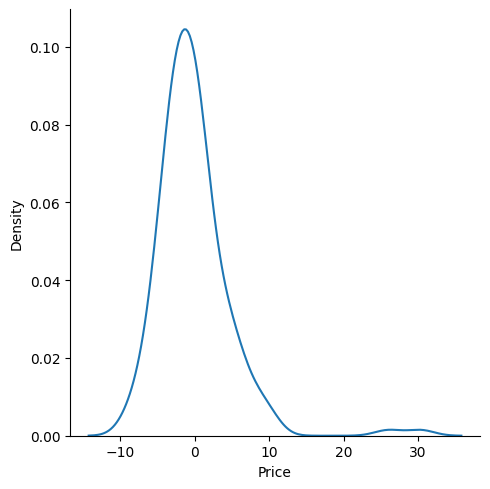

In [22]:
sns.displot(residuals, kind='kde'); # have to be normal distribution

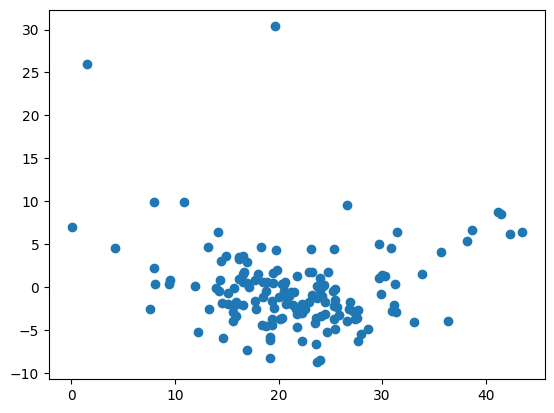

In [23]:
plt.scatter(lm_pred, residuals); # have to be uniform distribution

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
print(mean_squared_error(y_test, lm_pred))
print(mean_absolute_error(y_test, lm_pred))
print(np.sqrt(mean_squared_error(y_test, lm_pred)))

24.49924667563224
3.2890101600095796
4.9496713704681685


$R^2 = 1 - SSR/SST$   
Adjusted   $R^2 = 1 - [(1 - R^2)*(n - 1) / (n - k - 1)]$

In [25]:
score = r2_score(y_test, lm_pred)
adjR2 = 1 - ((1-score) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print(f'R2 = {score.round(5)}; \nAdj.R2 = {adjR2.round(5)}')

R2 = 0.67121; 
Adj.R2 = 0.66063


### ***New Data Prediction***

In [26]:
#pred1 = df.iloc[0, :-1].to_numpy().reshape(1,-1)
pred1 = scaler.transform(df.iloc[0, :-1].to_numpy().reshape(1,-1))
lm.predict(pred1)

array([27.59458012])

### ***Pickling the Model File for Deployment***

In [27]:
import pickle
pickle.dump(lm, open('LinRegModel.pkl', 'wb'))

In [28]:
pickled_model = pickle.load(open('LinRegModel.pkl', 'rb'))

In [29]:
pickled_model.predict(pred1)

array([27.59458012])